In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use developed library

create data set

In [2]:
X = [[0, 0], [1, 1], [1, 3], [1, 0.5]]
Y = [0, 1, 2, 1]

main classifier

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
print(clf.predict([[2., 2.]]))
print(clf.predict_proba([[2., 2.]]))

[1]
[[0. 1. 0.]]


plot

[Text(133.92000000000002, 181.2, 'X[1] <= 0.25\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 1]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 2.0\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

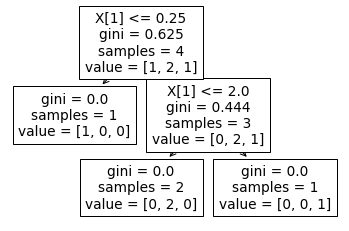

In [4]:
tree.plot_tree(clf)

In [5]:
# from sklearn.datasets import load_iris
# from sklearn import tree
# iris = load_iris()
# X, y = iris.data, iris.target
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, y)
# tree.plot_tree(clf)

# The replicated class for Decisin Tree


In [6]:
def create_data():
    data = [[1, 1],
                [1, 1],
                [1, 0],
                [0, 1],
                [0, 1]]
    labels = ['yes','yes', 'no', 'no', 'no']
    feature_label = ['surf', 'flip']
    label_int, label_str = pd.factorize(labels)
    combined = np.append(data, np.array([label_int]).transpose(), axis=1)
    return combined, label_str, feature_label

dataset, label, fea_label = create_data()

compute shannon entropy

In [7]:
from collections import Counter
def calc_shannon_ent(dataset):
    data = dataset[:,-1]
    count_dict = Counter(data)
    ent_sum = np.sum([n_*np.log(n_) for k_, n_ in count_dict.items()])
    return -(ent_sum / len(data) - np.log(len(data)))/np.log(2)

calc_shannon_ent(dataset)

0.9709505944546685

In [8]:
def split_to_branch(dataset, fea_label, axis, value):
    total_fea_num = dataset.shape[1] - 1
    branch = dataset[dataset[:,axis] == value, ]
    selected_col = np.append(np.arange(axis),np.arange(axis+1,total_fea_num+1)) 
    return branch[:, selected_col], fea_label[:axis] + fea_label[(axis+1):]

split_to_branch(dataset, fea_label, 0, 1)

(array([[1, 0],
        [1, 0],
        [0, 1]]),
 ['flip'])

In [9]:
def choose_best_split_feature(dataset):
    total_fea_num = dataset.shape[1] - 1
    best_feature, best_infogain = 0, float('inf')
    for f_ in range(total_fea_num):
        cur_info = 0 # base entropy, expect to decrease
        for v_ in set(dataset[:,f_]):
            cur_data = dataset[dataset[:,f_] == v_, ]
            cur_info += calc_shannon_ent(cur_data) * cur_data.shape[0]
        if cur_info < best_infogain:
            best_feature, best_infogain = f_, cur_info
    return best_feature

choose_best_split_feature(dataset)

0

In [10]:
# recursively create tree

def create_tree(dataset, labels, fea_label):
    # if all belongs to one class
    if len(set(dataset[:,-1])) == 1:
        return labels[dataset[0,-1]]
    
    # if no more feature to use
    if not len(fea_label):
        cate = sorted(Counter(dataset[:,-1]).items(), key=lambda x:x[1])
        return labels[cate[-1][0]]
    
    # select best feature
    best_fea = choose_best_split_feature(dataset)
    my_tree = {}
    for v_ in set(dataset[:,best_fea]):
        sub_data, sub_fea = split_to_branch(dataset, fea_label, best_fea, v_)
        my_tree[v_] = create_tree(sub_data, labels, sub_fea)
        
    return {fea_label[best_fea]: my_tree}

create_tree(dataset, label, fea_label)

{'surf': {0: 'no', 1: {'flip': {0: 'no', 1: 'yes'}}}}

In [11]:
def classify(new_vec, tree, fea_label):
    cur_tree = tree
    while type(cur_tree).__name__ != 'str':
        cur_fea = next(iter(cur_tree))
        split_tree = cur_tree[cur_fea]
        cur_tree = split_tree[new_vec[fea_label.index(cur_fea)]]
    
    return cur_tree

In [12]:
tree = create_tree(dataset, label, fea_label)
classify([1,1], tree, fea_label)

'yes'

In [13]:
def store_tree(tree, filename):
    import pickle
    fw = open(filename,'w')
    pickle.dump(inputTree,fw)
    fw.close()
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)